# 선형회귀 (Linear Regression)
선형회귀의 원리는 관찰값으로 부터 가장 거리가 짧은 데이터를 대표할 수 있는 선을 긋는것이며, 그 선을 회귀식이라고 한다.<br>
관찰값으로부터 가장 짧은 거리인지를 평가하는 방법은 최소제곱법(Least Square Method)이 주로 사용된다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

## 1. 정규 방정식을 사용한 선형회귀
- 선형회귀에서 모델파라미터인 𝜽를 예측하기 위해 사용하는 **최적화 알고리즘**이다.
- 찾고자하는 α(alpha)를 한번에 찾는 방법이다.
- MSE를 유도하여 만들어진 정규방정식은 **행렬 연산을 통해 한 번에 최적해를 구한다.**
- 정규방정식은 행렬 연산을 통해 결과를 구하기 때문에 **피처의 크기가 커지면 커질 수록 계산 시간이 오래 걸린다.**
- 피처의 크기가 적당한 수준이라면, 정규방정식을 사용.

- y = 3X + 4 (임의)

In [2]:
X = 2 * np.random.rand(100, 1)
y = 3 * X + 4 + np.random.randn(100, 1)

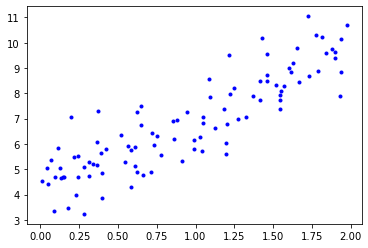

In [3]:
plt.plot(X, y, 'b.')

In [4]:
X_b = np.c_[np.ones((100, 1)), X] # 열끼리 합치기

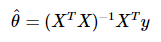

- 정규방정식 공식을 np.linalg (Inverse of a matrix, 역행렬) 함수를 이용해서 해를 구함

In [5]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  # 행렬 연산시 dot() 함수 사용

In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [7]:
# array([[4.21509616], # theta 0 (절편)
#        [2.77011339]]) # theta 1 (기울기)

- scikit-learn 제공 LinearRegression 사용

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [10]:
lin_reg.intercept_, lin_reg.coef_   # intercept_ : 절편 / coef_ : 기울기

(array([4.21509616]), array([[2.77011339]]))

## 2. 경사 하강법을 사용한 선형회귀

**경사하강법**
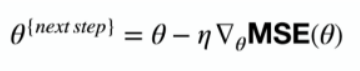

- 경사 하강법은 손실 함수의 랜덤 한 위치에서 기울기를 계산하고, 기울기가 0이 되는 방향으로 학습률(Learning rate, η)만큼 <br>
  점진적으로 이동하여, 최적해 α(alpha)를 찾는 방법이다.
- 위 과정은 전역 최적해를 찾기 위해 **반복 수행**되며, 반복 수행된다는 의미는 다양한 랜덤한 위치에서 경사 하강법이 실시된다는 의미다.
- 경사 하강법은 계산이 일어나 기본적으로 소모되는 시간이 크긴 하지만, 아무리 피처의 크기가 크더라도 일정 시간 안에 최적해를 찾아낼 수 있다.
-  피처의 크기가 지나치게 크다면 경사하강법을 사용

**[경사 하강법의 한계점]**
1. **데이터가 많아질수록 계산량 증가** <br>
   학습 데이터의 양이 늘어나는 경우, 계산량이 매우 커져 학습 속도가 느려진다.
2. **지역최소해 문제**<br>
   실제 손실 함수의 형태는 매끈하지 않고, <br>
   울퉁불퉁하기 때문에 실제로 찾아야 하는 전역 최적해가 아닌 지역 최소해를 찾을 수 있다.
3. **Plateau 문제**<br>
   평평한 지역(Plateau)에 들어가서, 학습이 더 이상 진행되지 못하는 문제
4. **Zigzag 문제**<br>
   찾아야 하는 해가 많아질수록 차원이 복잡해져, 제대로 해를 찾지 못하는 문제

**그레디언트**
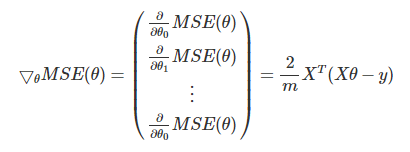

**배치 경사 하강법 (Batch Gradient Decent)** <br>
- 데이터셋 모두를 대상으로 하다보니 파라미터가 한번 이동할 때 마다, 계산해야 할 값이 지나치게 많으므로,<br>
  계산 시간도 엄청 길어지고, 소모되는 메모리도 엄청나다.<br>
  즉, **학습 데이터셋이 커지면 커질수록 시간과 리소스 소모가 지나치게 크다.**
- mini batch 안 모든 데이터를 대상으로 경사 하강법을 실시하므로, 안정적으로 수렴한다.
- 안정적으로 수렴하는 것은 좋으나, 안정적으로 움직이기 때문에 지역 최소해(Local Mininum)에 빠지더라도 안정적으로 움직이므로 <br>
  빠져나오기 힘들다. 즉, Local Optima(minimum) 문제가 발생할 가능성이 높다.

In [11]:
m = 100
theta = np.random.randn(2, 1)  # theta0, theta1
eta = 0.1  # 임의

n_iterations = 1000
for iteration in range(n_iterations):   
    # print(theta)  # 변해가능 과정 확인
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
    theta = theta - eta * gradients    

In [12]:
theta

array([[4.21509616],
       [2.77011339]])

**확률적 경사하강법 (Stochastic Gradient Descent, SGD)**
- 학습 데이터셋에서 **무작위로 한개의 샘플 데이터 셋을 추출**하고, 그 샘플에 대해서만 그라디언트(기울기)를 계산
- 샘플 데이터 셋에 대해서만 경사를 계산하므로, 매 반복에서 다뤄야 할 데이터 수가 매우 적어, 학습 속도가 매우 빠르다.
- 하나의 샘플만 대상으로 경사를 계산하므로, 메모리 소모량이 매우 낮으며, 매우 큰 훈련데이터 셋이라 할지라도 학습 가능하다. <br>
  그러나, 무작위로 추출된 샘플에 대해서 경사를 구하므로, 배치경사 하강법보다 훨씬 불안정하게 움직인다.<br>
- 비용함수가 최솟값에 다다를 때까지 위아래로 요동치면서 감소
  
→ 확률적 경사 하강법은 **속도가 매우 빠르고 메모리를 적게** 먹는다는 장점이 있으나, <br>
   경사를 구할때, 무작위성을 띄므로 지역 최솟값에서 탈출하기 쉬우나, **전역 최솟값에 다다르기 힘들다**는 단점을 가지고 있다.

In [13]:
np.random.seed(42)

In [14]:
X_b = np.c_[np.ones((100, 1)), X]

In [15]:
m = 100
theta = np.random.randn(2, 1)

t0, t1 = 5, 50
n_epochs = 50

def learning_schedule(t):
    return t0/(t + t1)

for epoch in range(n_epochs): #  epoch : 모든 데이터가 학습에 참여 했을 때 1 epoch
    for i in range(m): # m : 100개, 샘플 수
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1] # 1개의 샘플
        yi = y[random_index:random_index+1]   # 1개의 샘플
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) 
        eta = learning_schedule(epoch*m + i) # step수가 증가함에 따라 eta가 작아지게 함
        theta = theta - eta * gradients
        # print(theta)

In [16]:
theta

array([[4.21076011],
       [2.74856079]])

- scikit-learn 제공하는 SGDRegressor() 사용

In [17]:
from sklearn.linear_model import SGDRegressor

In [18]:
y.ravel().shape   # ravel() : 메모리를 공유하므로 원본 값도 같이 1차원으로 변경됨.

(100,)

In [19]:
y.flatten().shape  # flatten() : 메모리를 복사해서 다른 공간에 1차원으로 저장하므로 원본에는 변화가 없음

(100,)

In [20]:
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)  # penalty : 규제방법
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

**선형회귀 모델의 잠재적인 문제점**
- 데이터 자체가 선형적으로 표현이 안될 수 있음 -> 비선형적인 데이터를 표현할 수 있게 특성 추가(다항회귀)
- 시간을 두고 쌓인 데이터, 지리적으로 가까운 데이터인 경우 잘 동작을 안함 -> 다른 모델 사용(ARIMA, ARMA 등)
- 데이터(엄밀히는 예측과 실제의 차이)가 정규분포를 따르지 않으면 선형회귀 모델에서 성능이 떨어질 수 있음 -> 로그변환
- 바깥값이 있어도 잘 동작을 안함 -> 바깥값은 삭제
- 다중공선성 문제 -> 상관관계 큰 특성을 삭제 또는 제 3의 특성을 추출

## 3. 다항 회귀

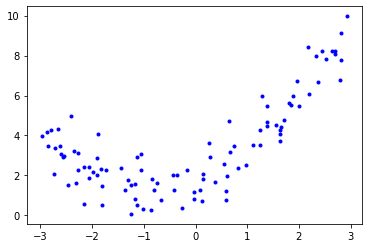

In [23]:
# 비선형성의 갖는 데이터를 준비하기 위해
# 0.5X**2 + X + 2 형태의 데이터를 임의로 준비
# 모델이 훈련을 마친후 모델 파라미터(0.5, 1, 2)에 근사하는지 확인

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, 'b.')

In [24]:
# 기본 선형회귀 모델로 모델링

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.56401543]), array([[0.84362064]]))

In [25]:
# 특성의 제곱하을 추가

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False) # 변환기의 한 종류
X_poly = poly_features.fit_transform(X)

In [26]:
X[0]

array([-0.75275929])

In [27]:
X_poly[0] # 원본 특성 X에 제곱이 된 특성 하나 더 추가된것을 확인할 수 있음

array([-0.75275929,  0.56664654])

In [28]:
(-0.75275929)**2

0.566646548681304

In [29]:
poly_features.get_feature_names()

C:\Users\sj926\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x0^2']

In [30]:
# 다항회귀기법(즉, 변환된 데이터로 훈련)을 이용하여 모델링
# 모델이 훈련을 마친후 모델 파라미터(0.5, 1, 2)에 근사하는지 확인

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_


(array([1.78134581]), array([[0.93366893, 0.56456263]]))

(100, 1) (100, 2)


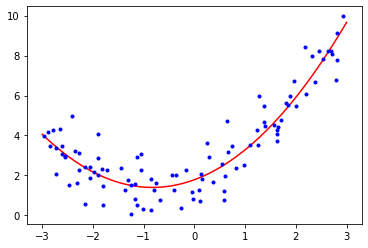

In [31]:
# 학습된 모델로 새로운 데이터(-3에서 3까지 100개의 데이터)에 대한 예측선 그리기

X_new = np.linspace(-3, 3, 100).reshape(100, 1) # 예측을 하기 위한 데이터로 X의 shape과 동일

# X가 전처리(특성 추가)된 부분이 새 데이터에도 반영이 되야함
X_new_poly = poly_features.transform(X_new)
print(X_new.shape, X_new_poly.shape)

y_pred = lin_reg.predict(X_new_poly) 

plt.plot(X_new, y_pred, 'r-') # 새로운 데이터에 대한 예측(선)
plt.plot(X, y, 'b.') # 데이터 샘플

## 4. 규제 모델

### 4.1 릿지 회귀 - L2 규제

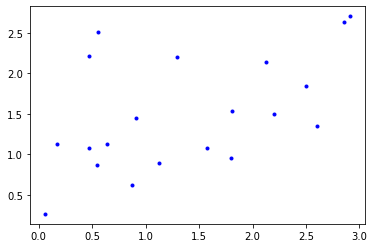

In [32]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 0.5 * X + 1 + np.random.randn(m,1)/1.5
plt.plot(X, y, 'b.')

In [33]:
y.shape

(20, 1)

In [34]:
# 선형 모델(규제없이)
lin_reg = LinearRegression()
lin_reg.fit(X, y) #y.ravel(), y.flatten()

LinearRegression()

In [35]:
lin_reg.intercept_, lin_reg.coef_

(array([0.97573667]), array([[0.3852145]]))

In [36]:
# 릿지모델(L2 규제가 들어간 모델) - 해석적으로 해를 구함

In [37]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, random_state=42)
ridge_reg.fit(X, y)

Ridge(alpha=1, random_state=42)

In [38]:
ridge_reg.intercept_, ridge_reg.coef_ # 절편(편향, theta 0) 는 규제가 되지 않음

(array([1.00650911]), array([[0.36280369]]))

In [39]:
# 릿지모델(L2 규제가 들어간 모델) - 경사하강법으로 해를 구함

In [40]:
# SGDRegressor 규제없이 훈련
sgd_reg = SGDRegressor(random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_ 

(array([0.53947472]), array([0.62043411]))

In [41]:
reg_sgd_reg = SGDRegressor(penalty='l2', alpha=0.1, random_state=42)
reg_sgd_reg.fit(X, y.ravel())
reg_sgd_reg.intercept_, reg_sgd_reg.coef_ 

(array([0.57901244]), array([0.58606577]))

### 4.2 라쏘 회귀 - L1 규제

In [42]:
from sklearn.linear_model import Lasso

# 라쏘모델(L1 규제가 들어간 모델) - 해석적으로 해를 구함
lasso_reg = Lasso(alpha=0.1, random_state=42)
lasso_reg.fit(X, y)
lasso_reg.intercept_, lasso_reg.coef_ 

(array([1.14537356]), array([0.26167212]))

In [43]:
# 라쏘모델(L1 규제가 들어간 모델) - 경사하강법으로 해를 구함
reg_sgd_reg = SGDRegressor(penalty='l1', alpha=0.1, random_state=42)
reg_sgd_reg.fit(X, y.ravel())
reg_sgd_reg.intercept_, reg_sgd_reg.coef_ 

(array([0.64450934]), array([0.54050476]))